# 1. Lý thuyết về mạng tích chập

## 1.1. Giới thiệu tích chập

Tích chập là một khái niệm trong xử lý tín hiệu số nhằm biến đổi thông tin đầu vào thông qua một phép tích chập với bộ lọc để trả về đầu ra là một tín hiệu mới. Tín hiệu này sẽ làm giảm những đặc trưng mà bộ lọc không quan tâm và chỉ giữ những đặc trưng chính. 

Tích chập thông dụng nhất là tích chập 2 chiều được áp dụng trên ma trận đầu vào và ma trận bộ lọc 2 chiều. Phép tích chập của một ma trận $\mathbf{X} \in \mathbb{R}^{W_1 \times H_1}$ với một *bộ lọc* (receptive field) $\mathbf{F} \in \mathbb{R}^{F \times F}$ là một ma trận $\mathbf{Y} \in \mathbb{R}^{W_2 \times H_2}$ sẽ trả qua những bước sau:

* Tính tích chập tại 1 điểm:
Tại vị trí đầu tiên trên cùng của ma trận đầu vào ta sẽ lọc ra một ma trận con $\mathbf{X}_{sub} \in \mathbb{R}^{F \times F}$ có kích thước bằng với kích thước của bộ lọc. Giá trị $y_{11}$ tương ứng trên $\mathbf{Y}$ là tích chập của $\mathbf{X}_{sub}$ với $\mathbf{F}$ được tính như sau:
$$y_{11}= \sum_{i = 1}^{F}  \sum_{j = 1}^{F} x_{ij} f_{ij}$$ 
* Tiến hành trượt dọc theo ma trận theo chiều từ trái qua phải, từ trên xuống dưới theo *bước nhảy* (stride) $S$ ta sẽ tính được các giá trị $y_{ij}$ tiếp theo. Sau khi quá trình này kết thúc ta thu được trọn vẹn ma trận $\mathbf{Y}$.

Trong một mạng nơ ron tích chập, các lớp liền sau lấy đầu vào từ lớp liền trước nó. Do đó để hạn chế lỗi trong thiết kế mạng nơ ron chúng ta cần xác định kích thước đầu ra ở mỗi lớp. Điều đó có nghĩa là dựa vào kích thước ma trận đầu vào $(W_1, H_1)$, kích thước bộ lọc $(F, F)$ và bước nhảy $S$ để xác định kích thước ma trận đầu ra $(W_2, H_2)$.

Xét quá trình trượt trên chiều $W_1$ của ma trận đầu vào. 

![](ConvWidthStep.png)
$$\text{Hình 1: Quá trình trượt theo chiều rộng (W1)}$$

Giả sử quá trình này sẽ dừng sau $W_2$ bước. Tại bước đầu tiên quá trình đi được đến vị trí thứ $F$. Sau mỗi bước liền sau sẽ tăng so với vị trí liền trước là $S$. Như vậy đến bước thứ $i$ quá trình trượt sẽ đi đến vị trí $F+(i-1)S$. Suy ra tại bước cuối cùng $W_2$ ma trận sẽ đi đến vị trí $F+(W_2-1)S$. Đây là vị trí lớn nhất gần với vị trí cuối cùng là $W_1$. Trong trường hợp lý tưởng thì $F+(W_2-1)S = W_1$. Từ đó ta suy ra:
$$W_2 = \frac{W_1-F}{S}+1 \tag{1}$$
Khi vị trí cuối cùng không trùng với $W_1$ thì số bước $W_2$ sẽ được lấy phần nguyên:
$$W_2 = [\frac{W_1-F}{S}]+1$$

Chúng ta luôn có thể tạo ra đẳng thức (1) nhờ thêm phần *đường viền* (padding) tại các cạnh của ảnh với độ rộng viền là $P$ sao cho phép chia cho $S$ là chia hết. Khi đó: $$W_2 = \frac{W_1+2P-F}{S}+1$$

![](WidthPadding.png)
$$\text{Hình 2: Thêm padding kích thước P vào 2 lề chiều rộng (W1)}$$

Hoàn toàn tương tự ta cũng có công thức ứng với chiều cao: $$H_2 = \frac{H_1+2P-F}{S}+1$$

## 1.2. Thực hành mạng tích chập

Trong ví dụ bên dưới ta sẽ thực hành sử dụng mạng tích chập để chiết xuất các đặc trưng chính của một bức ảnh. Thông qua hai bộ lọc thông dụng nhất là bộ lọc ngang $\left[\begin{matrix} -1 & -1 & -1 \\ 0
& 0 & 0 \\ 1 & 1 & 1\end{matrix}\right]$ được sử dụng để chiết xuất các đường nằm ngang và bộ lọc dọc $\left[\begin{matrix} -1 & 0 & 1 \\ -1
& 0 & 1 \\ -1 & 0 & 1\end{matrix}\right]$ dùng để chiết xuất các đường nét nằm dọc từ 1 bức ảnh.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

%matplotlib inline
X = cv2.imread('https://scontent.fhan2-3.fna.fbcdn.net/v/t1.0-9/31131205_1655267761229858_8661840822800482304_n.jpg?_nc_cat=109&_nc_ht=scontent.fhan2-3.fna&oh=a3c56598e53490f95d3648ab894f4ee0&oe=5C476E67', cv2.IMREAD_GRAYSCALE)
X = cv2.resize(X, (300, 300))
print('Image shape: %s'%str(X.shape))
plt.imshow(X)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Image shape: (720, 960)


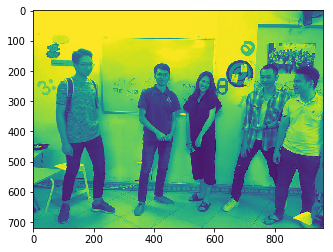

In [76]:
from PIL import Image
import urllib.request
from io import BytesIO

%matplotlib inline

url = str('https://scontent.fhan2-3.fna.fbcdn.net/v/t1.0-9/31131205_1655267761229858_8661840822800482304_n.jpg?_nc_cat=109&_nc_ht=scontent.fhan2-3.fna&oh=a3c56598e53490f95d3648ab894f4ee0&oe=5C476E67')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

X = np.array(Image.open(f))
print('Image shape: %s'%str(ig.shape))
# Convert to grey
X = X.dot([0.299, 0.5870, 0.114])
plt.imshow(X)

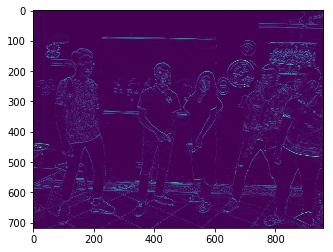

In [77]:
#Tạo bộ lọc ngang F1
F1 = np.array([[-1, -1, -1],
              [0, 0, 0],
              [1, 1, 1]])
#Tính tích chập 2 chiều.
def conv2d(X, F, s = 1, p = 0):
    """
    X: Ma trận đầu vào
    F: Ma trận bộ lọc
    s: Bước trượt
    p: Độ rộng lề thêm vào
    """
    (w1, h1) = X.shape
    f = F.shape[0]
    w2 = int((w1 + 2*p - f)/s) + 1
    h2 = int((h1 + 2*p - f)/s) + 1
    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width = p, mode = 'constant', constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i, j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)]*F))
    return Y

Y1 = conv2d(X, F1, s = 1, p = 0)
plt.imshow(Y1)

Ta nhận thấy bộ lọc trên có tác dụng nhận diện những đường nét theo chiều ngang của bức ảnh như các đường viền của bảng, mép dưới của áo, mép dưới của chân tường,.... Sở dĩ bộ lọc này làm nổi bật các đường nét nằm ngang là bởi vì tích chập của chúng bằng hiệu của tổng giá trị các điểm phía dưới trừ các điểm phía trên. Đối với các đường nét nằm ngang thì cường độ sáng nằm ngang theo đường nét đó không khác biệt lớn nhưng xét theo chiều dọc thì chúng sẽ khác nhau. Do đó hiệu giữa 2 tổng phía trên và dưới càng lớn dẫn tới giá trị của tích chập càng lớn khi trượt theo các đường nét nằm ngang này. Khi hoàn thành thiện ma trận tích chập các đường nét nằm ngang sẽ có cường độ sáng lớn hơn nên nổi bật hơn. Chúng ta sẽ thử nghiệm một bộ lọc khác để nhận diện chiều dọc của bức ảnh.

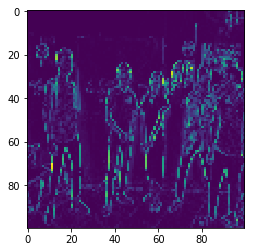

In [67]:
#Tạo bộ lọc dọc F2
F2 = np.array([[1, 0, -1],
             [1, 0, -1],
             [1, 0, -1]])
Y2 = conv2d(X, F2, s = 3, p = 0)
plt.imshow(Y2)

Bộ lọc cho thấy các đường nét dọc theo bức ảnh như dáng người đứng thẳng đã được nhận diện rõ ràng, các đướng nét ngang như viền bảng, chân tường, viền dưới áo,... đã biến mất. Như vậy chúng ta có thể thấy mỗi bộ lọc sẽ có 1 tác dụng chiết xuất đặc trừng khác nhau từ cùng 1 bức ảnh.

## 1.3. Mạng nơ ron tích chập

Tích chập được ứng dụng phổ biến trong lĩnh vực thị giác máy tính. Thông qua các phép tích chập, các đặc trưng chính từ ảnh được chiết xuất và truyền vào các lớp *tích chập* (layer convolution). Mỗi một lớp tích chập sẽ bao gồm nhiều đơn vị mà kết quả ở mỗi đơn vị là một phép biến đổi tích chập từ layer trước đó thông qua phép nhân tích chập với bộ lọc. 

Về cơ bản thiết kế của một mạng nơ ron tích chập 2 chiều có dạng như sau:

INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC

Trong đó:
INPUT: Lớp đầu vào
CONV: Lớp tích chập
RELU: Lớp biến đổi thông qua hàm kích hoạt relu để kích hoạt tính phi tuyến
POOL: Lớp chồng chất, thông thường là Max pooling hoặc có thể là Average pooling dùng để giảm chiều của ma trận đầu vào.
FC: Lớp kết nối hoàn toàn. Thông thường lớp này nằm ở sau cùng và kết nối với các đơn vị đại diện cho nhóm phân loại.
Các kí hiệu []*N, []*M hoặc []*K ám chỉ cấu trúc bên trong [] có thể lặp lại nhiều lần liên tiếp nhau. M, K là số lần lặp lại. 
Kí hiệu -> đại diện cho các lớp liền kề nhau mà lớp đứng trước -> sẽ làm đầu vào cho lớp đứng sau ->.


Như vậy ta có thể thấy một mạng nơ ron tích chập về cơ bản có 3 quá trình khác nhau:

* Quá trình chiết xuất đặc trưng: Thông qua các tích chập giữa ma trận đầu vào với bộ lọc để tạo thành các đơn vị trong một lớp mới. Quá trình này có thể diễn ra liên tục ở phần đầu của mạng và thường sử dụng hàm kích hoạt relu.

* Quá trình chồng chất: Các lớp ở về sau quá trình chiết xuất đặc trưng sẽ có kích thước lớn do số đơn vị ở các lớp sau thường tăng tiến theo cấp số nhân. Điều đó làm tăng số lượng hệ số và khối lượng tính toán trong mạng nơ ron. Do đó để giảm tải tính toán chúng ta sẽ cần giảm chiều của ma trận hoặc giảm số đơn vị của lớp. Vì mỗi một đơn vị sẽ là kết quả đại diện của việc áp dụng 1 bộ lọc để tìm ra một đặc trưng cụ thể nên việc giảm số đơn vị sẽ không khả thi. Giảm kích thước ma trận thông qua việc tìm ra 1 giá trị đại diện cho mỗi một vùng không gian mà bộ lọc đi qua sẽ không làm thay đổi các đường nét chính của bức ảnh nhưng lại giảm được kích thước của ảnh. Do đó quá trình giảm chiều ma trận được áp dụng. Quá trình này gọi là chồng chất.

* Quá trình kết nối hoàn toàn: Sau khi đã giảm số lượng tham số đến một mức độ hợp lý, ma trận cần được làm dẹt (flatten) thành một vector và sử dụng các kết nối hoàn toàn giữa các lớp. Quá trình này sẽ diễn ra cuối mạng tích chập và sử dụng hàm kích hoạt là relu. Kết nối cuối cùng sẽ dẫn tới các đơn vị là đại diện cho mỗi lớp với hàm kích hoạt là softmax nhằm mục đích tính xác xuất.


![](https://cdn-images-1.medium.com/max/800/1*NQQiyYqJJj4PSYAeWvxutg.png)

$\text{Hình 3: Cấu trúc đại diện của một mạng nơ ron tích chập, source: }$ [Mathworks.com]( Source: https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html)


## 1.4. Tính chất của mạng nơ ron tích chập

**Tính kết nối cục bộ:** Khác với các mạng nơ ron thông thường, mạng nơ ron tích chập không kết nối tới toàn bộ hình ảnh mà chỉ kết nối tới từng *vùng địa phương* (local region) có kích thước bằng kích thước bộ lọc của hình ảnh đó.

**Tính chia sẻ kết nối:** Các *vùng địa phương* được chia sẻ chung một bộ lọc. Mỗi bộ lọc đại diện cho một khả năng chiết xuất một đặc trưng nào đó. Do đó khi đi qua toàn bộ các vùng địa phương của bức ảnh các đặc trưng được chiết xuất sẽ hiển thị trên toàn bức ảnh.

# 2. Xây dựng mạng nơ ron tích chập

Bên dưới ta sẽ tiến hanh xây dựng một mạng nơ ron tích chập phân biệt chữ số viết tay trong bộ số liệu mnist thông qua sử dụng API estimator của tensorflow. Phần source code này được lấy từ trang chủ của tensorflow và được hiệu chỉnh để phù hợp với mục đích của bài viết.

In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.INFO)

def cnn_model_fn(features, labels, mode):
    """Model function for CNN"""
    #Input layer
    input_layer = tf.reshape(features['x'], shape = [-1, 28, 28, 1])
    
    #Convolution layer 1
    conv1 = tf.layers.conv2d(
        inputs = input_layer,
        filters = 32,
        kernel_size = [5, 5],
        padding = 'same',
        activation = tf.nn.relu)
    #Apply formula:N1 = (N+2P-f)/S + 1
    #in which: N is input image size, P is padding size, f is filter size and S is step
    #Output tensor shape: N1 = (28-5)/1+1 = 24 => shape = [-1, 24, 24, 1]
    #But we at parameter we set padding = 'same' in order to keep output shape unchange to input shape 
    #Thus output shape is [-1, 28, 28, 1]
    
    #Max pooling layer 1
    pool1 = tf.layers.max_pooling2d(
        inputs = conv1, 
        pool_size = [2, 2],
        strides = 2)
    #Output tensor shape: N2 = (28-2)/2+1 = 14 => shape = [-1, 14, 14, 1]
    
    #Convolution layer 2
    conv2 = tf.layers.conv2d(
        inputs = pool1,
        filters = 64,
        kernel_size = [5, 5],
        padding = 'same',
        activation = tf.nn.relu)
    #Output tensor shape: N3 = (14-5)/1+1 = 10 => shape = [-1, 10, 10, 1]
    #But padding = 'same' so output shape is [-1, 14, 14, 1]
    
    #Max pooling layer 2
    pool2 = tf.layers.max_pooling2d(
        inputs = conv2,
        pool_size = [2, 2],
        strides = 2)
    #Output tensor shape: N4 = (14-2)/2+1 = 7 => shape = [-1, 7, 7, 1]
    
    #Dense layer
    flat = tf.reshape(pool2, [-1, 7*7*64])
    dense = tf.layers.dense(
        inputs = flat, 
        units = 1024,
        activation = tf.nn.relu)
    
    dropout = tf.layers.dropout(
        inputs = dense,
        rate = 0.4,
        training = mode == tf.estimator.ModeKeys.TRAIN)
    
    #Logits layer
    logits = tf.layers.dense(inputs = dropout, units = 10)
    
    predictions = {
        'classes': tf.argmax(input = logits, axis = 1, name = 'class_tensor'),
        'probabilities': tf.nn.softmax(logits, name = 'softmax_tensor')}
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)

    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.1)
        train_op = optimizer.minimize(
            loss = loss, 
            global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = loss, train_op = train_op)
    
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metric_ops = {
            'accuracy': tf.metrics.accuracy(
            labels = labels, predictions = predictions['classes'])}
        return tf.estimator.EstimatorSpec(
            mode = mode, loss = loss, eval_metric_ops = eval_metric_ops)

Như vậy mạng nơ ron của chúng ta sẽ có cấu trúc:

* Lớp input: Có kích thước [-1, 28, 28, 1], số -1 biểu thị bất kì số lượng bức ảnh nào có thể truyền vào mô hình. 3 thành phần còn lại là chiều rộng, chiều cao và kênh của bức ảnh.

* Lớp tích chập số 1: Gồm 32 bộ lọc có kích thước [5, 5]. Chúng ta có thể khai báo đơn giản là `kernel_size = 5` trong trường hợp bộ lọc là vuông. Tham số `padding = same` để cố định kích thước của đầu ra so với đầu vào. Khi đó lớp sẽ tự động thêm viền ngoài để kích thước không đổi theo công thức $P = \frac{W_1(S-1)-1+F}{2}$. Như vậy sau bước này kích thước đầu ra vẫn sẽ là [-1, 28, 28, 1].

* Lớp chồng chất số 1: Có kích thước của bộ lọc là [2, 2] và bước nhảy là 2. Áp dụng công thức tính kích thước đầu ra ta sẽ suy ra w2 = h2 = (28-2)/2+1 = 14. Kích thước đầu ra sau bước này là [-1, 14, 14, 1].

* Lớp tích chập số 2: Gồm 64 bộ lọc có kích thước [5, 5] và thám số `padding = same` sẽ không thay đổi kích thước đầu ra so với lớp trước là [-1, 14, 14, 1].

* Lớp chồng chất số 2: Giống với lớp chồng chất số 1 với bộ lọc kích thước [2, 2] và bước nhảy 2. Do đó chiều dài và rộng của ma trận đầu ra sẽ là w2 = h2 = (14-2)/2+1 = 7. Kích thước đầu ra: [-1, 7, 7, 1].

* Lớp vector dàn phẳng: Ma trận ở lớp trước sẽ được dành phẳng nên có kích thước là 7x7. Kết hợp với chiều sâu = 64 là số lượng đơn vị ở layer trước ta suy ra kích thước của lớp này là 7x7x64 = 3136.

* Lớp dropout: Lớp này không làm thay đổi kích thước của lớp trước mà chỉ tác động vào quá trình training khi sẽ tắt ngẫu nhiên các đơn vị của lớp trước với xác xuất là `rate = 0.4` bằng cách gán cho trọng số ứng với đơn vị bị tắt bằng 0. Đây là một kĩ thuật trong *kiểm soát* (regularization) mô hình nhằm giảm thiểu overfiting và tăng mức độ chính xác của dự báo và tốc độ huấn luyện.

* Lớp output: Là một kết nối hoàn toàn tới 10 đơn vị đại diện cho 10 nhóm chữ số cần phân loại.

Bên dưới chúng ta sẽ load dữ liệu đầu vào dưới dạng numpy.

In [2]:
from mnist import MNIST
mndata = MNIST('./MNIST_data/')

mndata.load_training()
train_data = np.asarray(mndata.train_images)/255.0
train_labels = np.array(mndata.train_labels.tolist())

mndata.load_testing()
test_data = np.asarray(mndata.test_images)/255.0
test_labels = np.array(mndata.test_labels.tolist())

print('Train images shape      : %s'%str(train_data.shape))
print('Train labels shape shape: %s'%str(train_labels.shape))
print('Test  images shape      : %s'%str(test_data.shape))
print('Test  labels shape shape: %s'%str(test_labels.shape))

Khởi tạo Estimator

In [4]:
#Create the Estimator
mnist_classifier = tf.estimator.Estimator(
    model_fn = cnn_model_fn, 
    model_dir = './tmp/conv2_checkpoints' #temporary file to save model
)
#Create the Logging Hook to tracking processing
# tensors_to_log = {'probability': 'softmax_tensor',
#                  'class_values': 'class_tensor'}

# logging_hook = tf.train.LoggingTensorHook(
#     tensors = tensors_to_log, 
#     every_n_iter = 50
# )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './tmp/conv2_checkpoints', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E207B69D68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Khởi tạo hàm truyền dữ liệu

In [5]:
#Training model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_data},
    y = train_labels, 
    batch_size = 100,
    num_epochs = 1,
    shuffle = True
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./tmp/conv2_checkpoints\model.ckpt-110
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 110 into ./tmp/conv2_checkpoints\model.ckpt.
INFO:tensorflow:loss = 2.3187196254730225, step = 111
INFO:tensorflow:Saving checkpoints for 210 into ./tmp/conv2_checkpoints\model.ckpt.
INFO:tensorflow:Loss for final step: 2.294403076171875.


Hàm truyền dữ liệu sẽ bao gồm 2 biến chính là biến dự báo $\mathbf{x}$ và nhãn $\mathbf{y}$ với kích thước bach_size = 100 và mỗi batch sẽ được cập nhật dữ liệu 1 lần. Khi chuyển qua batch mới sẽ thay đổi vị trí các quan sát.

Huẩn luyện mô hình

In [ ]:
mnist_classifier.train(
    input_fn = train_input_fn,
    steps = 20000
#     hooks = [logging_hook]
)

Đánh giá mô hình trên tập test

In [6]:
#Validation on test
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x = {"x": test_data},
      y = test_labels,
      num_epochs = 1,
      shuffle = False)

eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-31-07:34:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./tmp/conv2_checkpoints\model.ckpt-210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-31-07:34:34
INFO:tensorflow:Saving dict for global step 210: accuracy = 0.0958, global_step = 210, loss = 2.3096735
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 210: ./tmp/conv2_checkpoints\model.ckpt-210
{'accuracy': 0.0958, 'loss': 2.3096735, 'global_step': 210}


# 3. Tài liệu 
1. [Tài liệu CS231n - Mạng nơ ron tích chập ứng dụng trong nhận diện hình ảnh - Standford](http://cs231n.github.io/convolutional-networks/)
2. [Tích chấp 2 chiều - Blog machine learning cơ bản - Vũ Hữu Tiệp](https://machinelearningcoban.com/2018/10/03/conv2d)
3. [Xây dựng mạng nơ ron tích chập sử dụng estimator - Tensoflow](https://www.tensorflow.org/tutorials/estimators/cnn)
4. [Image kenel - Victor Powell](http://setosa.io/ev/image-kernels/)
5. [Image Filtering - Blog Machine Learning Guru](http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html)